<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />MSc. Carsten Bauer</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 8
</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2020</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml)

**Themen dieses Notebooks:** Zufallszahlen in Julia, algorithmische Generatoren für Pseudo-Zufallszahlen, Korrelationen und Spektraltests

# Pseudo-Zufallszahlen

## 1. Zufallszahlen in Julia

### Gleichverteilte Pseudo-Zufallszahlen

### Seeds &mdash; reproduzierbare Zufallszahlen

### Random devices für unabhängige Zufallszahlen in parallelen Rechnungen

### Zufallszahlen Normalverteilung

### random strings

<hr/>

## 2. Generatoren für Pseudo-Zufallszahlen

### Linearer kongruenter Generator

$\quad x_{n+1} = (a*x_n + c) \mod m$ (integer representation 0 ... m-1)

<hr/>

### Lagged Fibonacci Generator

$\quad x_{i+1} = (x_{i-p} + x_{i-q}) \mod m$ (integer representation 0 ... m-1)

<hr/>

### Korrelierter Generator

In [ ]:
function my_badgenerator(seed, n)
    x = [seed/m]
    for i in 1:n
        next = x[i] + 0.05*rand()
        if next>1 
            next = next - 1
        end
        push!(x, next)
    end
    x[2:n+1]
end

In [ ]:
my_badgenerator(123456,10)

<hr/>

### Histogramme

<hr/>

### Korrelationen

$\quad \chi = \langle x_i \cdot x_{i+1} \rangle - \langle x_i \rangle^2$

In [ ]:
function correlations(random_numbers)
    xx = 0
    for i in 1:length(random_numbers)-1
        xx += random_numbers[i] * random_numbers[i+1]
    end
    xx /= length(random_numbers)-1
    
    x = 0
    for i in 1:length(random_numbers)
        x += random_numbers[i] 
    end
    x /= length(random_numbers)

    χ = xx - x^2    
end

#### Korrelationsverlauf für GGL

#### Korrelationsverlauf für lagged Fibonacci (und den Standard Mersenne-Twister)

In [ ]:
corr2 = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_laggedFibonacci(123456, n)
    c = correlations(x1)
    push!(corr2,c)
end

In [ ]:
corr3 = Float64[]
for i in 1:20
    n = 2^i
    x1 = rand(n)
    c = correlations(x1)
    push!(corr3,c)
end

In [ ]:
loglog(abs.(corr), marker="o", label="GGL")
loglog(abs.(corr2), marker="o", label="lagged Fibonacci")
#loglog(abs.(corr3), marker="o", label="Mersenne Twister")
legend();

#### Korrelationsverlauf für den "bad generator"

In [ ]:
corr4 = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_badgenerator(123456, n)
    c = correlations(x1)
    push!(corr4,c)
end

In [ ]:
loglog(abs.(corr), marker="o", label="GGL")
loglog(abs.(corr4), marker="o", label="bad generator")
# plot(abs.(corr4), marker="o", label="bad generator")
legend();

<hr/>

## 3. Spektraltests

#### Korrelationen im GGL?

In [ ]:
pygui(true)
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
xlim(0, 0.001)
ylim(0,1)
zlim(0,1);

### Sampling auf der Sphäre

[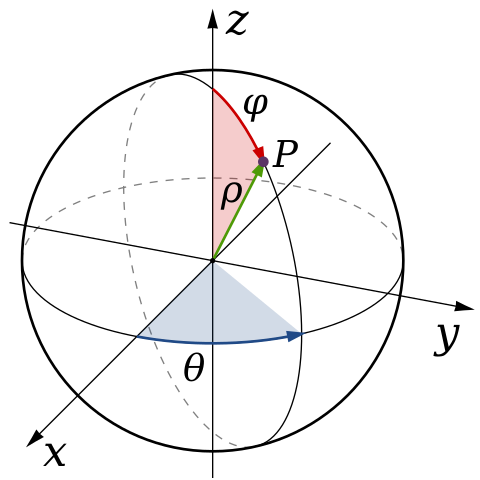](https://de.wikipedia.org/wiki/Kugelkoordinaten)

Definitionen: $\quad \theta$ polarer Winkel, $\quad \phi$ azimutaler Winkel, $\quad r=1$ Radius

Koordinaten:

$\quad x = \sin(\phi) \cdot \cos(\theta)$

$\quad y = \sin(\phi) \cdot \sin(\theta)$

$\quad z = \cos(\phi)$

### Verfahren 1 &mdash; zufälliger polarer und azimutaler Winkel

In [ ]:
# Display settings
fig = figure()
fig.canvas.manager.window.move(50,125)
gcf().set_size_inches(14, 16)
gcf().clf()
gcf().set_facecolor("white")

# 3D Plot
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
axis("off");

### Verfahren 2 &mdash; zufällige z-Koordinate und polarer Winkel

In [ ]:
function sample_sphere2(N)
    x = Float64[]
    y = Float64[]
    z = Float64[]
    
    for i in 1:N
        θ = rand()*2*π
        zz = -1+2*rand()
        
        push!(x, sqrt(1-zz*zz)*cos(θ))
        push!(y, sqrt(1-zz*zz)*sin(θ))
        push!(z, zz)
    end
    return x,y,z
end

In [ ]:
X,Y,Z = sample_sphere2(2000);

In [ ]:
# Display settings
fig = figure()
fig.canvas.manager.window.move(50,125)
gcf().set_size_inches(14, 16)
gcf().clf()
gcf().set_facecolor("white")

# 3D Plot
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
axis("off");